In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("myntra_data.csv")

In [3]:
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


Data Cleaning

In [5]:
df.nunique()

product_name         46013
brand_name            3194
rating                  42
rating_count          1201
marked_price          3219
discounted_price      4539
sizes                 2938
product_link        146438
img_link            146434
product_tag            341
brand_tag             3194
discount_amount       4290
discount_percent        92
dtype: int64

In [6]:
df.isna()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168024,False,False,False,False,False,False,False,False,False,False,False,False,False
168025,False,False,False,False,False,False,False,False,False,False,False,False,False
168026,False,False,False,False,False,False,False,False,False,False,False,False,False
168027,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.dropna()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168024,Ethnic Motifs Kaftan Dress,Soch,0.0,0,3998,3998,"S/M,L/XL",dresses/soch/soch-blue-ethnic-motifs-kaftan-dr...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",dresses,soch,0,0
168025,Leather Wedge Sandals with Tassels,fitflop,0.0,0,6799,6799,"EURO36,EURO37,EURO38,EURO39,EURO40",heels/fitflop/fitflop-tan-leather-wedge-sandal...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",heels,fitflop,0,0
168026,Leather Wedge Pumps,fitflop,0.0,0,5999,5999,"EURO36,EURO37,EURO38,EURO39,EURO40",heels/fitflop/fitflop-blue-leather-wedge-pumps...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",heels,fitflop,0,0
168027,V015 Professional Hair Trimmer,VGR,0.0,0,2695,995,Onesize,trimmer/vgr/vgr-men-v-015-professional-hair-tr...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",trimmer,vgr,1700,63


In [8]:
df

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168024,Ethnic Motifs Kaftan Dress,Soch,0.0,0,3998,3998,"S/M,L/XL",dresses/soch/soch-blue-ethnic-motifs-kaftan-dr...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",dresses,soch,0,0
168025,Leather Wedge Sandals with Tassels,fitflop,0.0,0,6799,6799,"EURO36,EURO37,EURO38,EURO39,EURO40",heels/fitflop/fitflop-tan-leather-wedge-sandal...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",heels,fitflop,0,0
168026,Leather Wedge Pumps,fitflop,0.0,0,5999,5999,"EURO36,EURO37,EURO38,EURO39,EURO40",heels/fitflop/fitflop-blue-leather-wedge-pumps...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",heels,fitflop,0,0
168027,V015 Professional Hair Trimmer,VGR,0.0,0,2695,995,Onesize,trimmer/vgr/vgr-men-v-015-professional-hair-tr...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",trimmer,vgr,1700,63


In [9]:
df.shape

(168029, 13)

In [10]:
df.isnull().sum()

product_name        0
brand_name          0
rating              0
rating_count        0
marked_price        0
discounted_price    0
sizes               0
product_link        0
img_link            0
product_tag         0
brand_tag           0
discount_amount     0
discount_percent    0
dtype: int64

In [11]:
df.describe()

,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
count,168029.000000,168029.000000,168029.00000,168029.000000,168029.000000,168029.000000
mean,2.264556,114.668658,2509.07457,1515.168757,993.905814,37.251909
std,2.101402,800.207065,2402.10918,1800.460291,1236.606569,24.638975
min,0.000000,0.000000,50.00000,49.000000,0.000000,0.000000
25%,0.000000,0.000000,1295.00000,674.000000,202.000000,15.000000
50%,3.500000,5.000000,1998.00000,999.000000,702.000000,40.000000
75%,4.300000,31.000000,2999.00000,1739.000000,1319.000000,59.000000
max,5.000000,55900.000000,113999.00000,45900.000000,68400.000000,91.000000


In [12]:
df = df.drop(["img_link","brand_tag"],axis = 1)

In [13]:
df.shape

(168029, 11)

In [14]:
df["product_link"] = df["product_link"].str.split("/")

In [15]:
df["product_link"][0]

['wallets',
 'lino-perros',
 'lino-perros-women-peach-coloured-croc-textured-two-fold-wallet',
 '18070682',
 'buy']

In [16]:
list = [df["product_link"][i][3] for i in range(len(df["product_link"]))] 

In [17]:
product = pd.Series(list)
df["Product_id"] = product.values

In [18]:
df = df.loc[:,["Product_id","product_name","brand_name","rating","rating_count","marked_price","discounted_price","discount_amount","discount_percent","sizes","product_link","product_tag"]]

In [19]:
df = df.drop("product_link", axis = 1)

In [20]:
df

,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag
0,18070682,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,467,36,Onesize,wallets
1,12548958,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,715,55,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops
2,13446092,Printed A-line Kurta,Biba,4.3,66,1999,1599,400,20,"S,M,L,XL,XXL,3XL",kurtas
3,18017006,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,60,10,"7-8Y,8-9Y,9-10Y",tshirts
4,18015232,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,0,0,"S,M,L,XL",kurta-sets
...,...,...,...,...,...,...,...,...,...,...,...
168024,18245896,Ethnic Motifs Kaftan Dress,Soch,0.0,0,3998,3998,0,0,"S/M,L/XL",dresses
168025,18713222,Leather Wedge Sandals with Tassels,fitflop,0.0,0,6799,6799,0,0,"EURO36,EURO37,EURO38,EURO39,EURO40",heels
168026,18713224,Leather Wedge Pumps,fitflop,0.0,0,5999,5999,0,0,"EURO36,EURO37,EURO38,EURO39,EURO40",heels
168027,18054182,V015 Professional Hair Trimmer,VGR,0.0,0,2695,995,1700,63,Onesize,trimmer


In [21]:
df.value_counts("Product_id")

Product_id
17985382    7
16768050    7
15154532    7
18369362    7
17122282    6
           ..
15787106    1
15786716    1
15786704    1
15786688    1
9996453     1
Name: count, Length: 146435, dtype: int64

In [22]:
df[df["Product_id"] == "14984314"]

,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag
25933,14984314,Boys Pack Of 5 Joggers,LilPicks,4.3,51,2699,1619,1080,40,"2-3Y,3-4Y,4-5Y,5-6Y,6-7Y",track-pants
35559,14984314,Boys Pack Of 5 Joggers,LilPicks,4.3,52,2699,1619,1080,40,"2-3Y,3-4Y,4-5Y,5-6Y,6-7Y",track-pants


In [23]:
df.shape

(168029, 11)

In [24]:
df = df.drop_duplicates("Product_id")

In [25]:
df.shape

(146435, 11)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146435 entries, 0 to 167991
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product_id        146435 non-null  object 
 1   product_name      146435 non-null  object 
 2   brand_name        146435 non-null  object 
 3   rating            146435 non-null  float64
 4   rating_count      146435 non-null  int64  
 5   marked_price      146435 non-null  int64  
 6   discounted_price  146435 non-null  int64  
 7   discount_amount   146435 non-null  int64  
 8   discount_percent  146435 non-null  int64  
 9   sizes             146435 non-null  object 
 10  product_tag       146435 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 13.4+ MB


Univariate Analysis

In [28]:
df.head(2)

,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag
0,18070682,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,467,36,Onesize,wallets
1,12548958,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,715,55,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops


In [29]:
df.nunique()

Product_id          146435
product_name         46012
brand_name            3194
rating                  42
rating_count          1201
marked_price          3219
discounted_price      4539
discount_amount       4290
discount_percent        92
sizes                 2938
product_tag            341
dtype: int64

In [30]:
df["product_name"].value_counts()

product_name
Slim Fit Casual Shirt                               1844
Men Slim Fit Jeans                                  1293
Men Running Shoes                                   1047
Women Open Toe Flats                                 897
Men Slim Fit Casual Shirt                            831
                                                    ... 
Floral Front Slit Midi Dress                           1
Floral Leather Structured Sling Bag                    1
Women Cotton Culottes Trousers                         1
Pack Of 2 Striped Pure Cotton 210 GSM Bath Towel       1
Solid Twill Seat Cushion                               1
Name: count, Length: 46012, dtype: int64

In [31]:
df_tag = df["product_tag"].value_counts().to_frame().reset_index().rename(columns = {"index":"product_tag", "product_tag":"count"})

In [32]:
df["sizes"].value_counts()

sizes
Onesize                                                                                20619
S,M,L,XL,XXL                                                                           15329
XS,S,M,L,XL                                                                            11102
S,M,L,XL                                                                               10726
XS,S,M,L,XL,XXL                                                                         8794
                                                                                       ...  
UK5,UK5.5,UK6.5,UK7                                                                        1
32A,32B,32C,32D,32DD,34A,34B,34C,34D,34DD,36A,36B,36C,36D,36DD,38A,38B,38C,38D,38DD        1
1Y,18M,2Y,4Y,6Y,8Y                                                                         1
28/30,29/30,30/30,31/32,32/32,33/32,34/32,34/34,36/34,38/34                                1
27.5,29,30,32                                                   

In [33]:
df.head(2)

,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag
0,18070682,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,467,36,Onesize,wallets
1,12548958,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,715,55,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops


C:\Users\achyu\AppData\Local\Temp\ipykernel_7496\3881989854.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["rating"])
C:\Users\achyu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\achyu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na

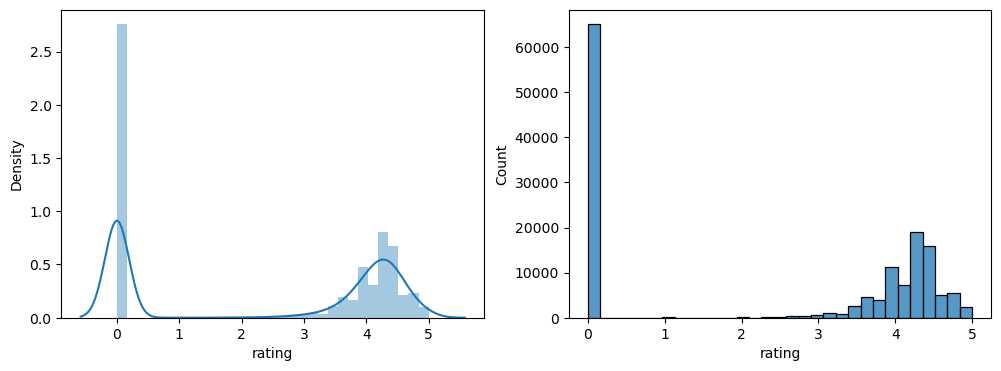

In [34]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(df["rating"])
plt.subplot(1,2,2)
sns.histplot(df["rating"])
plt.show()

C:\Users\achyu\AppData\Local\Temp\ipykernel_7496\2472749138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["rating"]!=0]["rating"])
C:\Users\achyu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Density'>

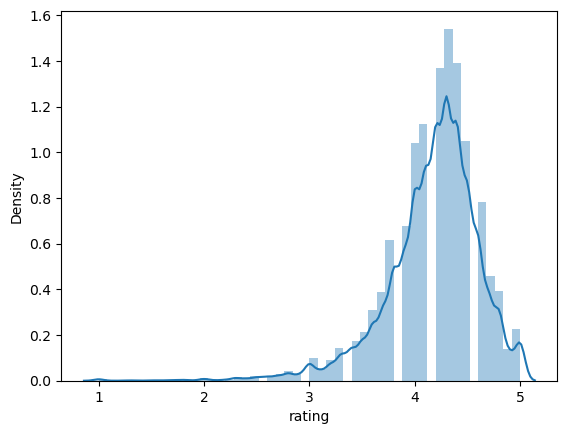

In [35]:
sns.distplot(df[df["rating"]!=0]["rating"])

C:\Users\achyu\AppData\Local\Temp\ipykernel_7496\231352132.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["marked_price"])
C:\Users\achyu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\achyu\AppData\Local\Temp\ipykernel_7496\231352132.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibili

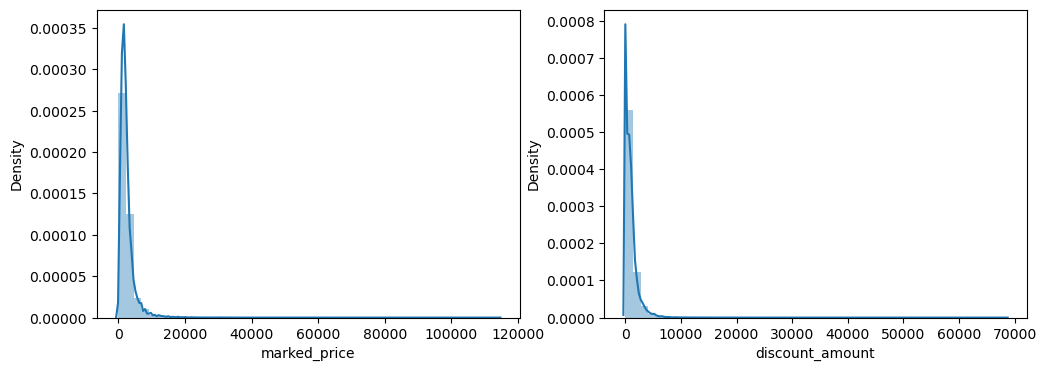

In [36]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(df["marked_price"])
plt.subplot(1,2,2)
sns.distplot(df["discount_amount"])
plt.show()

In [37]:
df["discount_percent"].value_counts()

discount_percent
0     25800
50    12581
60     9120
40     7394
30     7370
      ...  
90       40
88       27
87       17
89        6
91        1
Name: count, Length: 92, dtype: int64

Analysis for Brands

<Axes: xlabel='brand_name'>

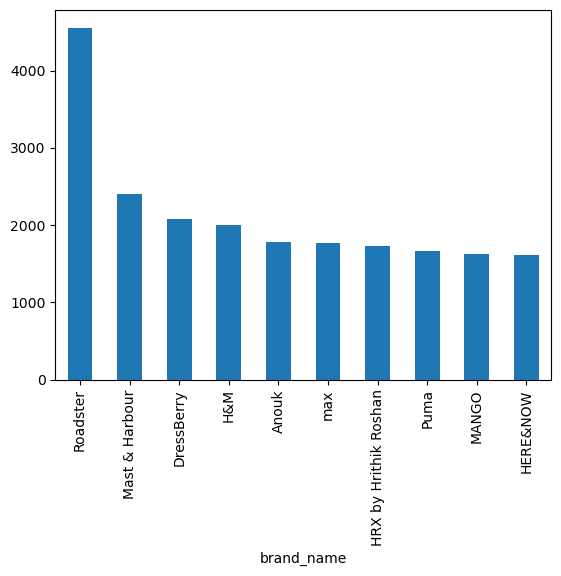

In [39]:
df["brand_name"].value_counts().head(10).plot(kind = "bar")

In [40]:
df_new = df
df_new["rating_prod"] = df_new["rating"]*df_new["rating_count"]

C:\Users\achyu\AppData\Local\Temp\ipykernel_7496\1187399020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["rating_prod"] = df_new["rating"]*df_new["rating_count"]


In [41]:
df["brand_name"].value_counts()

brand_name
Roadster          4557
Mast & Harbour    2397
DressBerry        2073
H&M               1998
Anouk             1784
                  ... 
Plume                1
ALC Creations        1
FLUID                1
Astaberry            1
LIL PITAARA          1
Name: count, Length: 3194, dtype: int64

In [42]:
df[df["rating_count"]==0]["brand_name"].value_counts()

brand_name
max                        1054
H&M                        1000
MANGO                       930
URBANIC                     862
Roadster                    862
                           ... 
YNB YOURS NATURAL BUDDY       1
FIXDERMA                      1
MARK HOME                     1
FROGGY                        1
LIL PITAARA                   1
Name: count, Length: 2615, dtype: int64

In [43]:
len(df[df["brand_name"]=="max"])

1772

In [87]:
df_new = df
df_new["sales_value"] = df_new["discounted_price"]*df_new["rating_count"]
df_new["rating_prod"] = df_new["rating"]*df_new["rating_count"]
product_discounts_sales = df_new.groupby("product_tag").agg({'discount_percent': 'mean', 'sales_value': 'sum', "rating_prod":"sum", "rating_count":"sum"}).reset_index()

C:\Users\achyu\AppData\Local\Temp\ipykernel_7496\1322536431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["sales_value"] = df_new["discounted_price"]*df_new["rating_count"]
C:\Users\achyu\AppData\Local\Temp\ipykernel_7496\1322536431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["rating_prod"] = df_new["rating"]*df_new["rating_count"]


In [89]:
product_discounts_sales["average_rating"] = product_discounts_sales["rating_prod"]/product_discounts_sales["rating_count"] 
product_discounts_sales = product_discounts_sales.drop("rating_prod", axis = 1)

In [93]:
product_discounts_sales

,product_tag,discount_percent,sales_value,rating_count,average_rating
0,accessory-gift-set,46.987500,4744567,3690,4.408672
1,action-figures-and-play-set,15.500000,5319,9,3.600000
2,activity-toys-and-games,54.750000,300243,357,3.935014
3,air-fryer,36.000000,0,0,NaN
4,anklet,61.295455,2451395,5493,4.267431
...,...,...,...,...,...
336,watches,33.308071,664690725,339656,4.283034
337,water-bottle,21.035294,1143421,1414,4.452122
338,windchimes,53.666667,7485,15,4.600000
339,wristbands,45.000000,15360,40,4.400000


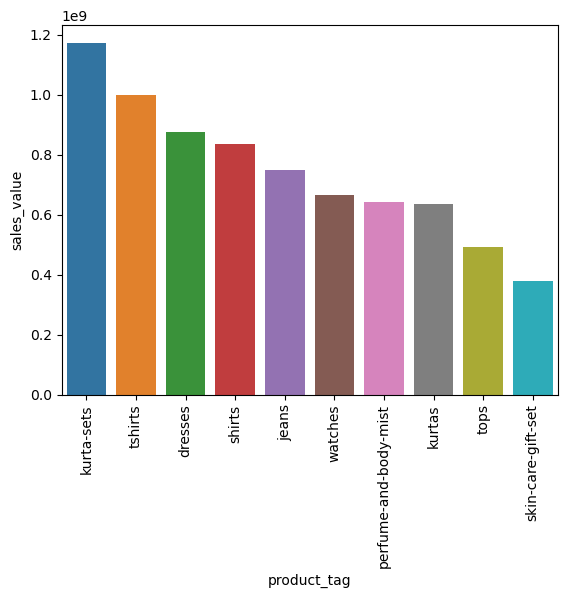

In [95]:
sns.barplot(data = product_discounts_sales.sort_values("sales_value", ascending = False).head(10), x = "product_tag", y = "sales_value" )
plt.xticks(rotation = 90)
plt.show()

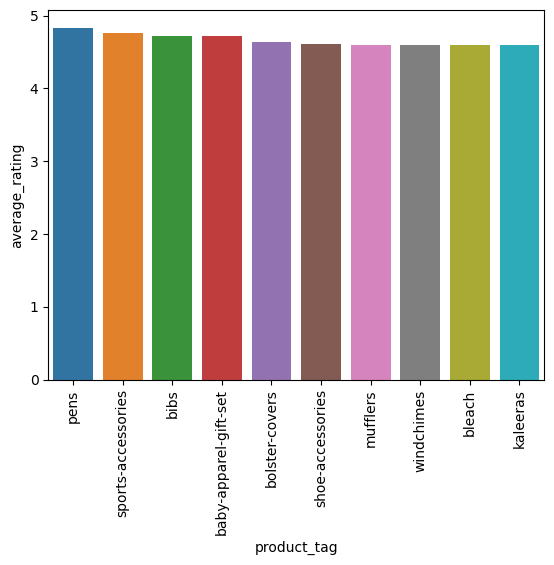

In [97]:
sns.barplot(data = product_discounts_sales.sort_values("average_rating", ascending = False).head(10), x = "product_tag", y = "average_rating" )
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='average_rating', ylabel='sales_value'>

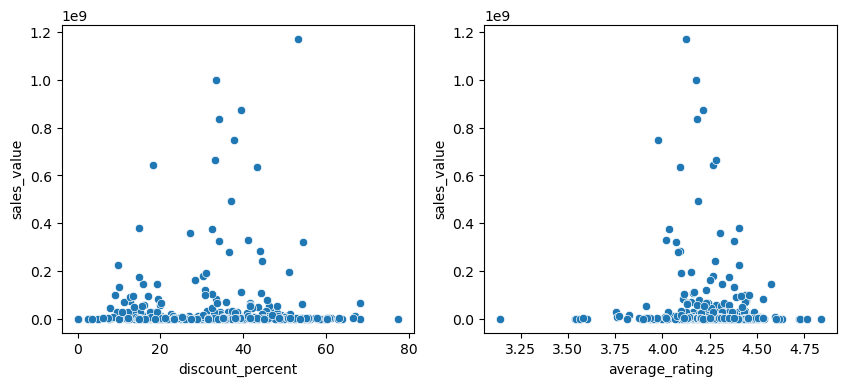

In [99]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.scatterplot(data = product_discounts_sales, x="discount_percent" , y= "sales_value")
plt.subplot(1,2,2)
sns.scatterplot(data = product_discounts_sales, x="average_rating" , y= "sales_value")

C:\Users\achyu\AppData\Local\Temp\ipykernel_7496\1116375924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(product_discounts_sales["discount_percent"] )
C:\Users\achyu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='discount_percent', ylabel='Density'>

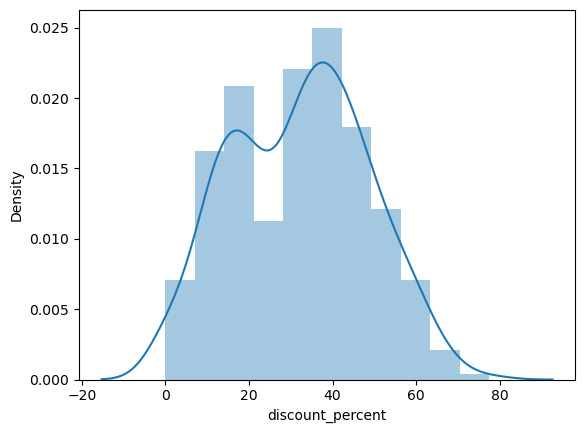

In [101]:
sns.distplot(product_discounts_sales["discount_percent"] )

In [105]:
df.head(2)

,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag,rating_prod,sales_value
0,18070682,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,467,36,Onesize,wallets,0.0,0
1,12548958,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,715,55,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops,304.0,44384


In [107]:
df_prod_brand = df.groupby(["product_tag", "brand_name"]).sum()

In [109]:
df_prod_brand["avg_rating"] = df_prod_brand["rating_prod"]/df_prod_brand["rating_count"]

In [113]:
df_prod_brand = df_prod_brand.reset_index()

In [115]:
df_prod_brand

,index,product_tag,brand_name,Product_id,product_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,rating_prod,sales_value,avg_rating
0,0,accessory-gift-set,Allen Solly,1826307818263138182630621841579618263102182630...,Men Solid Accessory Gift SetMen Printed Access...,0.0,0,16993,13423,3570,147,OnesizeOnesizeOnesizeOnesizeOnesizeOnesizeOnesize,0.0,0,NaN
1,1,accessory-gift-set,Blacksmith,165124681225929014443798,Men Solid Accessory Gift SetMen Accessory Gift...,7.8,167,18597,4847,13750,209,OnesizeOnesizeOnesize,681.9,307113,4.083234
2,2,accessory-gift-set,COSA NOSTRAA,1383967813839652,Men The Royal Elephant Brooch Gift SetMen The ...,0.0,0,7898,5923,1975,50,OnesizeOnesize,0.0,0,NaN
3,3,accessory-gift-set,CRUSSET,1640857613735370,Men Accessory Gift SetWomen Pack of 2 Belts,9.4,36,4298,1116,3182,148,"30,32,34,36,38,40,42Onesize",169.2,20088,4.700000
4,4,accessory-gift-set,Calvadoss,1173786811694214117292101733375411728934,Men Leather Accessory Gift SetMen Premium Acce...,11.0,23,13194,3847,9347,347,"34,32,44,30,42,40,48,38,36,4644,48,34,38,36,42...",85.4,17419,3.713043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,12213,yoga-mats,LUXEHOME INTERNATIONAL,18108462,Solid Yoga Mats,0.0,0,799,799,0,0,Medium,0.0,0,NaN
12214,12214,yoga-mats,Man Matters,17773234,Waterproof Yoga Mat,4.8,10,699,503,196,28,Standard,48.0,5030,4.800000
12215,12215,yoga-mats,NYAMBA By Decathlon,14165450,Solid Yoga Mat,4.1,46,1499,1499,0,0,Medium,188.6,68954,4.100000
12216,12216,yoga-mats,Puma,1322495614304600,Anti-Slip Reversible Yoga MatWomen Solid Train...,7.5,285,3998,2498,1500,80,LongMedium,1278.0,216465,4.484211


In [117]:
df_prod_brand["product_tag"].unique()

array(['accessory-gift-set', 'action-figures-and-play-set',
       'activity-toys-and-games', 'air-fryer', 'anklet',
       'appliance-covers', 'aprons', 'aroma-oil-diffusers',
       'artificial-flowers-and-plants', 'baby-apparel-gift-set',
       'baby-bed-sets', 'baby-care-products', 'baby-dolls',
       'baby-gear--nursery', 'baby-photoshoot-props', 'baby-utensils',
       'backpacks', 'badminton-racquets', 'bakeware', 'bangle',
       'bar-accessories', 'bar-and-drinkware', 'basketballs',
       'bath-accessories', 'bath-and-body-gift-set', 'bath-robe',
       'bath-rugs', 'bath-soak-salt-and-oil', 'bath-towels',
       'bathroom-accessories', 'bb-and-cc-cream', 'bean-bag-cover',
       'beard--moustache-care', 'beauty-accessory', 'beauty-gift-set',
       'bed-covers', 'bedding-set', 'bedsheets', 'belts', 'bibs', 'bins',
       'blankets-quilts-and-dohars', 'blazers', 'bleach', 'body-lotion',
       'body-oil', 'body-wash-and-scrub', 'body-wax-and-essentials',
       'bodysuit', 

In [119]:
df_prod_brand[df_prod_brand["product_tag"]=="shirts"][["brand_name","avg_rating"]].sort_values("avg_rating", ascending = False).head(20)

,brand_name,avg_rating
8367,Luxure by Louis Philippe,5.000000
8332,JBN Creation,5.000000
8450,SHIRT THEORY,5.000000
8306,HOUSE OF KKARMA,5.000000
8528,YOVISH,4.820000
8533,Zeal,4.800000
8238,CAVIO,4.760000
8204,Allen Solly Junior,4.734375
8291,Fbella,4.714286
8398,Nauti Nati,4.700000
